# AB Testing

In [1]:
#Trataiento de datos
import pandas as pd
pd.set_option('display.max_columns',None)  # Lim columnas
#-------------------
#Exportación archivos
import sys
sys.path.append('../')
#-------------------
#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
#-------------------
#Funciones personalizadas
from src import sp_abtest as sab
#-------------------
#Estadísticas
import scipy.stats as stats

In [2]:
df = pd.read_csv('../data/data_limpio_nonulos.csv')
df.sample(5)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_knn
475,476,b,2022-02-18,0,beauty,1656,lipstick,0,0.14,0.00,no_compra,no_compra,south,54.0,other,mobile,28,no_compra,other,social,no,97.52
1097,1098,a,2022-03-02,0,electronics,1331,headphones,0,0.08,0.00,no_compra,no_compra,north,42.0,f,desktop,4,no_compra,safari,social,no,323.59
172,173,b,2022-02-15,1,toys,1055,action_figure,1,0.13,21.38,paypal,express,north,20.0,f,mobile,14,no,edge,paid,yes,24.57
312,313,a,2022-02-09,0,sports,1645,running_shoes,0,0.13,0.00,no_compra,no_compra,south,67.0,f,mobile,9,no_compra,chrome,email,no,208.23
774,775,b,2022-01-04,0,electronics,1655,smartphone,0,0.11,0.00,no_compra,no_compra,central,19.0,f,mobile,25,no_compra,chrome,email,no,683.29


In [3]:
#Dos grupos de usuarios, el grupo B mayor pero la diferencia es pequeña.
df['group'].value_counts()/df.shape[0]*100

group
b    50.65
a    49.35
Name: count, dtype: float64

In [4]:
sab.exploracion_df_abtesting(df, 'group')

Los principales estadísticos de las columnas categóricas para el grupo: A son:


,count,unique,top,freq
group,987,1,a,987
visit_date,987,90,2022-01-19,19
product_category,987,7,fashhion,165
product_name,987,28,jeans,49
payment_method,987,5,no_compra,886
shipping_method,987,4,no_compra,886
region,987,5,south,225
customer_gender,987,3,f,492
device,987,3,tablet,354
coupon_used,987,3,no_compra,886


Los principales estadísticos de las columnas numéricas para el grupo: A son:


,count,mean,std,min,25%,50%,75%,max
user_id,987.0,999.448835,576.199597,1.00,518.500,983.000000,1498.50,2000.00
conversion,987.0,0.102330,0.303236,0.00,0.000,0.000000,0.00,1.00
product_id,987.0,1498.579534,293.157734,1001.00,1248.000,1495.000000,1754.50,1998.00
quantity,987.0,0.291793,0.972212,0.00,0.000,0.000000,0.00,5.00
discount,987.0,0.152396,0.085578,0.00,0.080,0.150224,0.23,0.30
total_value,987.0,41.642280,218.045865,0.00,0.000,0.000000,0.00,2899.50
customer_age,987.0,43.584600,15.263729,18.00,30.500,42.000000,56.00,70.00
session_duration,987.0,15.721378,8.697904,1.00,8.000,16.000000,23.00,30.00
price_knn,987.0,182.785984,209.210432,5.02,47.435,99.950000,232.75,998.88


------------------------------------------------------------------------------------------------
Los principales estadísticos de las columnas categóricas para el grupo: B son:


,count,unique,top,freq
group,1013,1,b,1013
visit_date,1013,90,2022-01-28,22
product_category,1013,7,fashhion,156
product_name,1013,28,science_fiction,58
payment_method,1013,5,no_compra,867
shipping_method,1013,4,no_compra,867
region,1013,5,east,217
customer_gender,1013,3,f,505
device,1013,3,mobile,357
coupon_used,1013,3,no_compra,867


Los principales estadísticos de las columnas numéricas para el grupo: B son:


,count,mean,std,min,25%,50%,75%,max
user_id,1013.0,1001.524186,579.036318,2.00,489.00,1015.00,1501.00,1997.00
conversion,1013.0,0.144126,0.351391,0.00,0.00,0.00,0.00,1.00
product_id,1013.0,1504.463968,281.364999,1000.00,1266.00,1527.00,1736.00,1997.00
quantity,1013.0,0.448174,1.200514,0.00,0.00,0.00,0.00,5.00
discount,1013.0,0.148109,0.085847,0.00,0.07,0.15,0.22,0.30
total_value,1013.0,61.607828,249.343541,0.00,0.00,0.00,0.00,2904.07
customer_age,1013.0,42.693978,15.148251,18.00,29.00,42.00,56.00,70.00
session_duration,1013.0,15.547878,8.690150,1.00,8.00,16.00,23.00,30.00
price_knn,1013.0,186.312447,210.559922,5.34,45.85,111.97,230.83,995.65


------------------------------------------------------------------------------------------------


In [5]:
df.sample(4)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_knn
741,742,a,2022-01-30,0,toys,1274,board_game,0,0.15,0.0,no_compra,no_compra,west,30.0,f,tablet,12,no_compra,safari,organic,no,98.14
287,288,b,2022-01-14,0,home,1090,sofa,0,0.05,0.0,no_compra,no_compra,south,58.0,other,tablet,4,no_compra,firefox,paid,no,496.26
1148,1149,b,2022-03-07,0,fashhion,1831,sneakers,0,0.12,0.0,no_compra,no_compra,south,31.0,f,tablet,27,no_compra,other,paid,no,86.62
59,60,a,2022-03-27,1,fashhion,1090,dress,1,0.04,127.6,cash_on_delivery,standard,west,28.0,f,tablet,30,yes,firefox,social,yes,132.92


# Métricas a estudiar
- conversión
- total_value
- session_duration
- quantity

Text(0.5, 1.0, 'Cantidad')

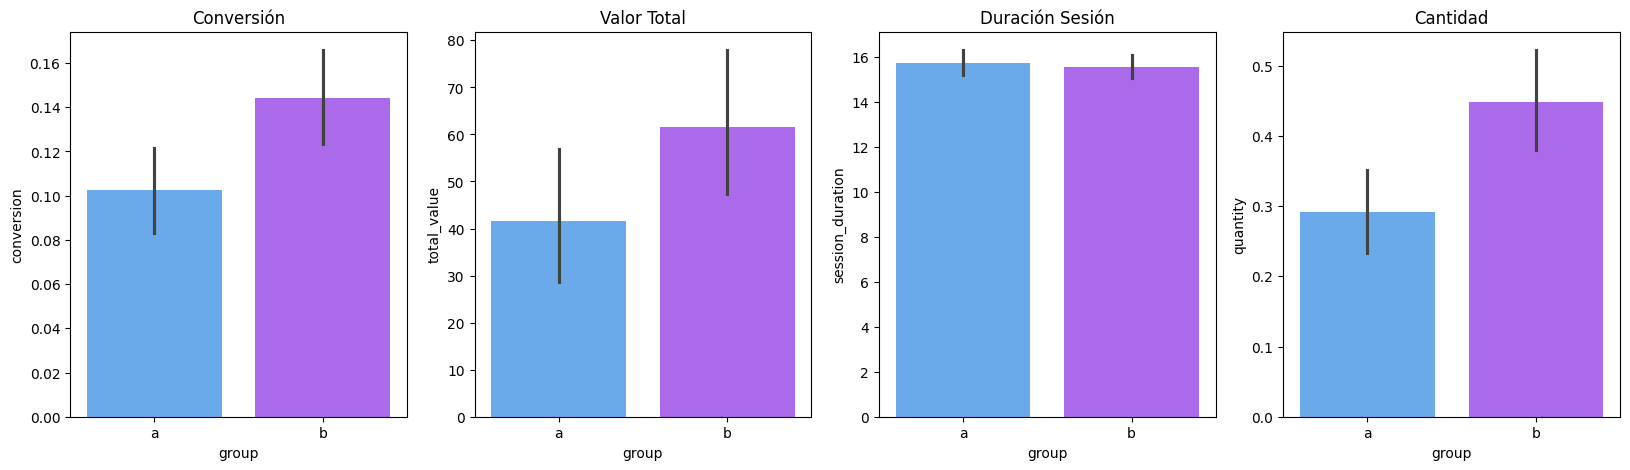

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
sns.barplot(x='group', y='conversion', data=df, ax=axes[0], hue='group', palette='cool')
axes[0].set_title('Conversión')
sns.barplot(x='group', y='total_value', data=df, ax=axes[1], hue='group', palette='cool')
axes[1].set_title('Valor Total')
sns.barplot(x='group', y='session_duration', data=df, ax=axes[2], hue='group', palette='cool')
axes[2].set_title('Duración Sesión')
sns.barplot(x='group', y='quantity', data=df, ax=axes[3], hue='group', palette='cool')
axes[3].set_title('Cantidad')

In [12]:
metricas = ['conversion', 'total_value', 'session_duration', 'quantity']

In [13]:
sab.normalidad(df, metricas)

Para la columna CONVERSION los datos NO siguen una distribución normal
Para la columna TOTAL_VALUE los datos NO siguen una distribución normal
Para la columna SESSION_DURATION los datos NO siguen una distribución normal
Para la columna QUANTITY los datos NO siguen una distribución normal


In [14]:
sab.homocedascidad(df, 'group', metricas)

Para la columna CONVERSION las varianzas NO son homogéneas entre grupos, NO hay homocedascidad
Para la columna TOTAL_VALUE las varianzas son homogéneas entre grupos, SI hay homocedascidad
Para la columna SESSION_DURATION las varianzas son homogéneas entre grupos, SI hay homocedascidad
Para la columna QUANTITY las varianzas NO son homogéneas entre grupos, NO hay homocedascidad


In [15]:
sab.mannwhitneyu (df, 'group', metricas)
    

Para la métrica CONVERSION, las medianas NO son iguales, es decir, SÍ hay diferencias significativas entre los grupos
Para la métrica TOTAL_VALUE, las medianas NO son iguales, es decir, SÍ hay diferencias significativas entre los grupos
Para la métrica SESSION_DURATION, las medianas son iguales, es decir, NO hay diferencias entre los grupos
Para la métrica QUANTITY, las medianas NO son iguales, es decir, SÍ hay diferencias significativas entre los grupos


Resultado: vamos bien con los cambios, hay diferencias significativas, pero para mal un grupo mejor que otro y esos cambios tal vez tienen un costo mayor a los ingresos, es mejor como estaba antes.